# My Notebook

### 1. Import Libraries

In [316]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

### 2. Explore Data

#### 2.1 Import Data

In [318]:
df1 = pd.read_csv("data/speed_price_att_other_cities.csv")
df2 = pd.read_csv("data/speed_price_att.csv")
df3 = pd.read_csv("data/speed_price_centurylink.csv")
df4 = pd.read_csv("data/speed_price_earthlink.csv")
df5 = pd.read_csv("data/speed_price_verizon.csv")
df = pd.concat([df1, df2, df3, df4, df5])

(rows, cols) = df.shape
print("{} Rows x {} Columns".format(rows, cols))
df.head()

1500880 Rows x 7 Columns


,major_city,state,provider,speed_down,speed_up,speed_unit,price
0,cleveland,OH,AT&T,0.768,0.384,Mbps,55.0
1,cleveland,OH,AT&T,0.000,0.000,NaN,NaN
2,cleveland,OH,AT&T,0.000,0.000,NaN,NaN
3,cleveland,OH,AT&T,0.000,0.000,NaN,NaN
4,cleveland,OH,AT&T,0.000,0.000,NaN,NaN


#### 2.2 Summarize ISP Classifications

<Axes: xlabel='provider', ylabel='count'>

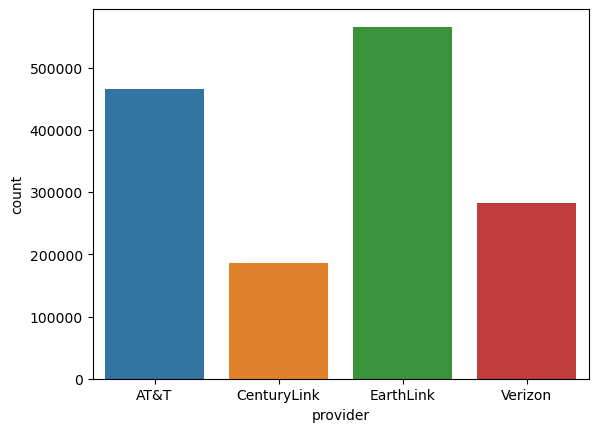

In [319]:
sns.countplot(x='provider', data=df)

### 3. Prepare Data

#### 3.1 Remove Extraneous Columns

In [320]:
df = df.drop(columns=['state', 'speed_unit', 'price'])
df.head()

,major_city,provider,speed_down,speed_up
0,cleveland,AT&T,0.768,0.384
1,cleveland,AT&T,0.000,0.000
2,cleveland,AT&T,0.000,0.000
3,cleveland,AT&T,0.000,0.000
4,cleveland,AT&T,0.000,0.000


#### 3.2 Reorder Columns

In [321]:
df = df[['major_city', 'speed_down', 'speed_up', 'provider']]
df.head()

,major_city,speed_down,speed_up,provider
0,cleveland,0.768,0.384,AT&T
1,cleveland,0.000,0.000,AT&T
2,cleveland,0.000,0.000,AT&T
3,cleveland,0.000,0.000,AT&T
4,cleveland,0.000,0.000,AT&T


#### 3.3 Remove Invalid Rows

Remove rows containing **0** as the upload speed or download speed.

In [322]:
(before_rows, _) = df.shape
df = df[(df != 0).all(1)]
(after_rows, _) = df.shape
print(str(before_rows - after_rows) + " rows removed.")
df.head()

313429 rows removed.


,major_city,speed_down,speed_up,provider
0,cleveland,0.768,0.384,AT&T
5,cleveland,0.768,0.384,AT&T
7,cleveland,1.000,1.000,AT&T
9,cleveland,5.000,1.000,AT&T
10,cleveland,5.000,1.000,AT&T


#### 3.4 Sample Data

Take a subset of the data for improved performance.

In [323]:
df = df.sample(10000)
(rows, cols) = df.shape
print("{} Rows x {} Columns".format(rows, cols))
df.head()

10000 Rows x 4 Columns


,major_city,speed_down,speed_up,provider
21790,phoenix,15.0,0.75,EarthLink
125548,chicago,100.0,20.00,AT&T
100202,denver,15.0,0.75,EarthLink
124525,chicago,300.0,300.00,AT&T
53098,des moines,6.0,0.50,CenturyLink


#### 3.5 Encode City Labels

Convert city strings into numbers for later use in the model.

In [324]:
le = LabelEncoder()
df['major_city_encoded'] = le.fit_transform(df['major_city'])
city_encodings = dict()
for city in df['major_city'].unique():
    encoding = df[df['major_city'] == city]['major_city_encoded'].values[1]
    city_encodings[city] = encoding
df['major_city'] = df['major_city_encoded']
df = df.drop('major_city_encoded', axis=1)
df.head(10)

,major_city,speed_down,speed_up,provider
21790,39,15.0,0.75,EarthLink
125548,12,100.0,20.00,AT&T
100202,15,15.0,0.75,EarthLink
124525,12,300.0,300.00,AT&T
53098,16,6.0,0.50,CenturyLink
425306,36,18.0,1.50,EarthLink
292979,10,300.0,300.00,AT&T
111796,0,80.0,10.00,CenturyLink
87455,37,3.0,0.50,CenturyLink
517038,19,100.0,100.00,EarthLink


### 4. Further Data Exploration

#### 4.1 Feature Distribution

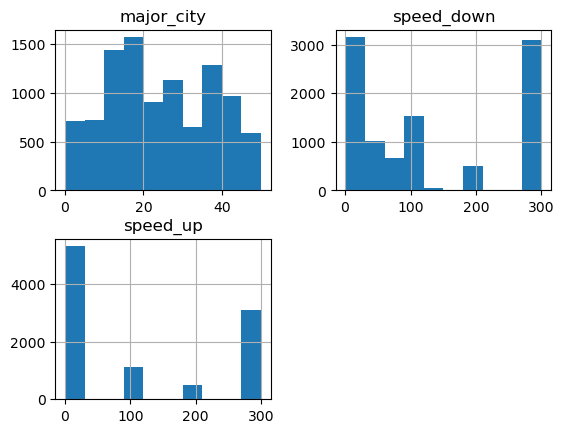

In [327]:
df.hist()
plt.show()

#### 4.2 Feature Relationships

array([[<Axes: xlabel='major_city', ylabel='major_city'>,
        <Axes: xlabel='speed_down', ylabel='major_city'>,
        <Axes: xlabel='speed_up', ylabel='major_city'>],
       [<Axes: xlabel='major_city', ylabel='speed_down'>,
        <Axes: xlabel='speed_down', ylabel='speed_down'>,
        <Axes: xlabel='speed_up', ylabel='speed_down'>],
       [<Axes: xlabel='major_city', ylabel='speed_up'>,
        <Axes: xlabel='speed_down', ylabel='speed_up'>,
        <Axes: xlabel='speed_up', ylabel='speed_up'>]], dtype=object)

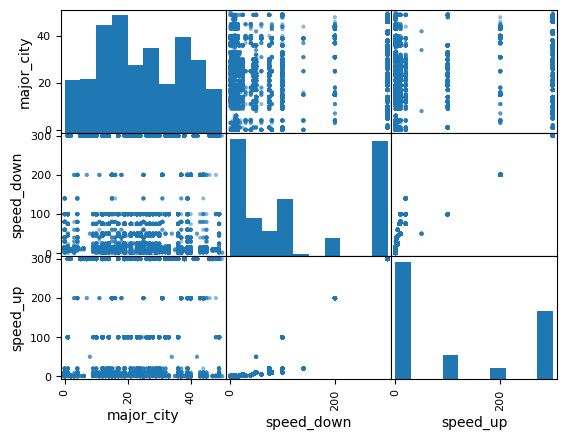

In [328]:
scatter_matrix(df)

### 5. Prepare Data for Machine Learning

#### 5.1 Split Data into Train/Test

70% Train data, 30% test data.

In [329]:
y = df.values[:, 3] # dependent variable (prediction)
X = df.values[:, 0:3] # independent variables (used to make prediction)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
print("Training data shape: ", X_train.shape)
print("Testing data has shape: ", X_test.shape)

Training data shape:  (7000, 3)
Testing data has shape:  (3000, 3)


### 6. Logistic Regression Model

#### 6.1 Create Logistic Regression Model

In [331]:
log_model = linear_model.LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 6.2 Calculate Model Accuracy

In [335]:
y_pred_log = log_model.predict(X_test)
print("Accuracy: ", round(metrics.accuracy_score(y_test, y_pred_log) * 100, 2), "%")

Accuracy:  52.97 %


#### 6.3 Confusion Matrix

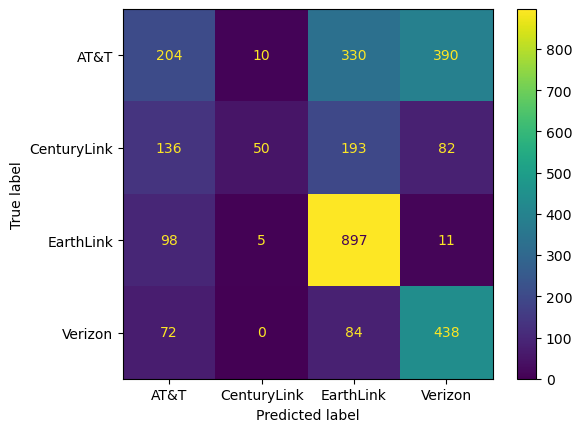

In [336]:
cm = metrics.confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()

### 7. Make Prediction

Run the code below to view a list of available cities to make predictions for.

In [337]:
cities = []
for city in city_encodings:
  cities.append("'" + city + "'")
city_groups = np.array_split(cities, 7)

print("City Choices:")
for group in city_groups:
  print(", ".join(group))

City Choices:
'phoenix', 'chicago', 'denver', 'des moines', 'oklahoma city', 'charlotte', 'albuquerque', 'omaha'
'houston', 'providence', 'louisville', 'baltimore', 'philadelphia', 'wichita', 'little rock', 'memphis'
'fargo', 'brooklyn', 'atlanta', 'milwaukee', 'indianapolis', 'queens', 'los angeles'
'new orleans', 'columbus', 'las vegas', 'kansas city', 'minneapolis', 'virginia beach', 'sioux falls'
'jacksonville', 'staten island', 'portland', 'seattle', 'newark', 'jackson', 'detroit'
'boston', 'bridgeport', 'cleveland', 'bronx', 'billings', 'nashville', 'wilmington'
'washington', 'boise', 'new york', 'charleston', 'huntsville', 'salt lake city', 'cheyenne'


Run the code below to predict a potential customer's current ISP based on the city they live in and their download and upload speed.

In [338]:
def f():
    input_city = input("Please enter a city from the list above: ")
    if input_city not in city_encodings:
        print("Invalid city.")
        return
    city = city_encodings[input_city]
    input_download = input("Please enter a download speed (Mbps): ")
    download = float(input_download)
    input_upload = input("Please enter an upload speed (Mbps): ")
    upload = float(input_upload)
    print("Customer's city: " + input_city.capitalize())
    print("Customer's download speed: " + str(download) + " Mbps")
    print("Customer's upload speed: " + str(upload) + " Mbps")
    prediction = log_model.predict([[city, download, upload]])
    print("The customer is most likely currently using: " + prediction[0])

f()

Customer's city: Houston
Customer's download speed: 54.6 Mbps
Customer's upload speed: 3.2 Mbps
The customer is most likely currently using: AT&T
